In [2]:
# Craig Miller
# cmiller@wpi.edu
# Deep Learning for Advanced Robot Perception
#
# Larger CNN for the HW7-8, Team #2 Facial Recognition Dataset

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import deep_utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
import time

In [3]:
start=time.time()
#Initialize tensorflow GPU settings
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
config = tf.ConfigProto(gpu_options=gpu_options)
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [5]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

print('Loading data')
#Load data from pickle files
X,y,y_names=deep_utils.load_pickle_files(r"/home/cstx2/datarepo/hw7-8-copy/X.p", r"/home/cstx2/datarepo/hw7-8-copy/y.p", r"/home/cstx2/datarepo/hw7-8-copy/y_names.p")

print('Splitting data')
## Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed,shuffle=True)

#Clear variables for memory
X=None
y=None


Loading data
Splitting data


In [6]:
print('Reshaping data')
## reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3]).astype(np.uint8)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3]).astype(np.uint8)

print('Normalizing data')
# normalize inputs from 0-255 to 0-1
X_train=np.divide(X_train,255)
X_test=np.divide(X_test,255)

Reshaping data
Normalizing data


In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]

In [10]:
def larger_model():
    '''Define network model'''
    model = Sequential()
    model.add(Convolution2D(30, 5, 5, border_mode='valid', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu',init='he_normal'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu',init='he_normal'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu',init='he_normal'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu',init='he_normal'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

print('Building model')
# build the model
model = larger_model()

model.summary()

Building model


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (5, 5), input_shape=(32, 32, 3..., activation="relu", padding="valid")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="he_normal")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="he_normal")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 30)        2280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               69248     
__________

In [11]:
print('Fitting model')
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=128, verbose=2)

finish=time.time()
elapsed=finish-start
print('Runtime :'+str(elapsed)+' seconds')

Fitting model
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 59128 samples, validate on 29123 samples
Epoch 1/10
35s - loss: 0.3445 - acc: 0.8797 - val_loss: 0.0023 - val_acc: 0.9995
Epoch 2/10
26s - loss: 0.0162 - acc: 0.9951 - val_loss: 6.7425e-04 - val_acc: 0.9999
Epoch 3/10
31s - loss: 0.0096 - acc: 0.9968 - val_loss: 5.9791e-04 - val_acc: 0.9998
Epoch 4/10
29s - loss: 0.0058 - acc: 0.9983 - val_loss: 3.8405e-04 - val_acc: 0.9999
Epoch 5/10
28s - loss: 0.0067 - acc: 0.9981 - val_loss: 1.1720e-04 - val_acc: 1.0000
Epoch 6/10
23s - loss: 0.0070 - acc: 0.9977 - val_loss: 1.5186e-05 - val_acc: 1.0000
Epoch 7/10
29s - loss: 0.0037 - acc: 0.9990 - val_loss: 1.2350e-04 - val_acc: 1.0000
Epoch 8/10
29s - loss: 0.0043 - acc: 0.9988 - val_loss: 7.2080e-05 - val_acc: 1.0000
Epoch 9/10
35s - loss: 0.0077 - acc: 0.9981 - val_loss: 2.0563e-05 - val_acc: 1.0000
Epoch 10/10
32s - loss: 0.0016 - acc: 0.9995 - val_loss: 7.1045e-05 - val_acc: 1.0000
Runtime :5313.492872476578 seconds


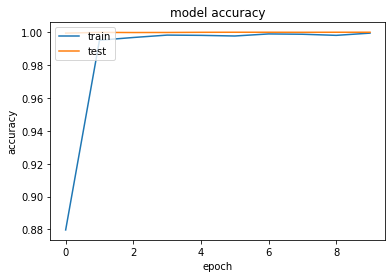

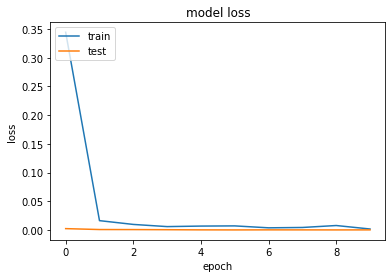

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 30)        2280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               69248     
__________

In [12]:
deep_utils.plot_accuracy(history)
deep_utils.plot_loss(history)

print(model.summary())

In [13]:
deep_utils.save_model(model,serialize_type='yaml',model_name='facial_recognition_large_cnn_model')

facial_recognition_large_cnn_model & weights saved to disk.
